In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
# import dataset

data= pd.read_csv("first.csv", names=['first_name'],nrows=1000)
# data = data
data.head()

,first_name
0,americanpatriotjeff
1,thanachotsiriviboon
2,lakshmiprasannarani
3,venkatasubramaniam
4,venkatapadmanabham


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
first_name    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [4]:
data[data['first_name'].duplicated(keep=False)].sort_values('first_name').head(8)

,first_name


In [5]:
data = data.drop_duplicates('first_name')

# NLP 

# Preparing data for vectorizaion
However, when doing natural language processing, words must be converted into vectors that machine learning algorithms can make use of. If your goal is to do machine learning on text data, like movie reviews or tweets or anything else, you need to convert the text data into numbers. This process is sometimes referred to as “embedding” or “vectorization”.

In terms of vectorization, it is important to remember that it isn’t merely turning a single word into a single number. While words can be transformed into numbers, an entire document can be translated into a vector. Not only can a vector have more than one dimension, but with text data vectors are usually high-dimensional. This is because each dimension of your feature data will correspond to a word, and the language in the documents you are examining will have thousands of words.

# TF-IDF
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes; 83% of text-based recommender systems in the domain of digital libraries use tf-idf.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [6]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['first_name'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [7]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

1000
[]


# Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

# Tokenizing
Tokenization is breaking the sentence into words and punctuation,

In [11]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [12]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

1000
['abdelghafour', 'abdelmetalab', 'abderrahmen', 'abdourahman', 'abdulghaffar', 'abdullahami', 'abdulmoteleb', 'abdulrashe', 'abedalhakeem', 'abramchayeva', 'adasankrumah', 'adayanthrath', 'adegbemisola', 'adrianadrian', 'agaissemarjori', 'agriventur', 'ahamedsaneej', 'aiyakrishnan', 'ajigbotoluwa', 'akhileshwari', 'akhmetkhanov', 'alalasundram', 'alessandrina', 'alexandrale', 'alexstephen', 'allalaghatta', 'alliedbarton', 'amaliajeann', 'amandalauren', 'ambikaipakan', 'ameeruzzaman', 'americanpatriotjeff', 'amoghavarsha', 'anandashankar', 'anandeganesh', 'anandhav', 'anandhavalavan', 'anantanaraya', 'anashunderia', 'andiputranto', 'andirectorew', 'andrewcolman', 'andrewjoseph', 'andrewkeenan', 'andrewsom', 'angelantonio', 'angelnanthia', 'anirudhreddi', 'anjanechnica', 'annakriseljeen']


C:\Users\neha.patil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [13]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

C:\Users\neha.patil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


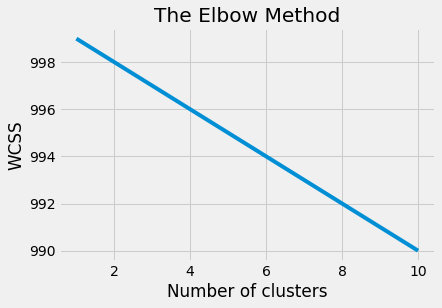

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [15]:
print(words[250:300])

['deantoinett', 'deborahjulia', 'deepaaishwarya', 'deniseatwork', 'denisemeiyan', 'desantelic', 'devassykutti', 'devendrakumar', 'devendranath', 'devitriyanti', 'devnarayanan', 'dhairyasheel', 'dhanamjayulu', 'dhananjayulu', 'dharamaind', 'dharmeshkumar', 'dhivyaraksha', 'dhruvinkumar', 'dhyaneshwaran', 'dianalumsdon', 'dietrichvic', 'djanaguiraman', 'doddametikurk', 'donnalakshmi', 'dorothybell', 'douglasboswel', 'dreadsington', 'drewmargaret', 'dubarrington', 'duraimurugan', 'durreshahwar', 'dwarakanadha', 'eamonmauric', 'eleftheri', 'elizabethada', 'elizabethden', 'elizabethvdf', 'emmacastillo', 'emmanouilidi', 'entertain', 'erinmichell', 'estherteresa', 'eswaraprasad', 'evanemmanuel', 'faramihamina', 'felixpeguero', 'fessessework', 'florencetin', 'fradleydavid', 'frankcharl']


# 3 Clusters

In [16]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : zvikomborero, haileselasi, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, jaypinderp, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor, graceclayton
1 : alexstephen, zvikomborero, hennerberg, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, habibunnisha, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor
2 : kimberlyann, zvikomborero, habibunnisha, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekhar

# 5 Clusters

In [17]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : zvikomborero, haileselassi, hectordaniel, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselasi, jeanetamari, habibunnisha, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor
1 : eleftheri, zvikomborero, haileselasi, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, hectordaniel, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor, graceclayton
2 : chauntalayn, zvikomborero, haileselasi, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, gnanasekeran, gurusubrahmaniyan, gurkanwaljit, gurcharan

# 6 Clusters

In [18]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : zvikomborero, habibunnisha, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, gurusubrahmaniyan, jatinderjeet, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor, graceclayton, gowrisangeetha
1 : venkateswarrao, zvikomborero, gurusubrahmaniyan, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, habibunnisha, gurkanwaljit, heatherleigh, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor, graceclayton, gowrisangeetha
2 : chennakesava, zvikomborero, haileselasi, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, gnanasekeran, gurusubrahmaniyan, gurkanwaljit

# 8 Clusters

In [19]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : zvikomborero, haileselassi, hectordaniel, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselasi, jeanetamari, habibunnisha, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor
1 : chennakesava, zvikomborero, haileselasi, heatherleigh, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, gnanasekeran, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor
2 : yurgalevitch, zvikomborero, habibunnisha, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, gurusubrahmaniyan, hectordaniel, gurkanwaljit, gurcharanjit, gurba

In [20]:
kmeans = KMeans(n_clusters = 100, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : zvikomborero, hermannjosef, isabelleann, instruct, indirectr, illonaillona, ilangkumaran, ilanduraiyan, ianthalatr, hpuemerg, housseynatou, honchristian, hitchmoungh, hermenejildo, hennerberg, isselmouould, hectordaniel, heatherleigh, harsimranjeet, harshwardhan, harshavardan, harryschmink, harinderpaul, hariharanath, hardeepind
1 : muruleedhara, zvikomborero, haileselasi, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, habibunnisha, gnanaprakash, gurusubrahmaniyan, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekharan, gregoryallan, graceeleanor, graceclayton
2 : jackequelin, zvikomborero, habibunnisha, hasanilesedi, harsimranjeet, harshwardhan, harshavardan, harryschmink, harishankaran, harinderpaul, hariharanath, hardeepind, haralambid, hajamohideen, haileselassi, haileselasi, gurusubrahmaniyan, hectordaniel, gurkanwaljit, gurcharanjit, gurbakhshash, gunasekhara